# Algorithms and mathematics of machine learning
## Laboratory 9

### Task 1

1. Load the `flats.csv` file, e.g. using libraries:
   - [`pandas`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) (`read_csv`),
   - [`numpy`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) (`genfromtxt`),
   - [`csv`](https://docs.python.org/3/library/csv.html) (`reader`).
2. Delete invalid data, e.g. a row containing the value `-` or the value $0$ should be deleted.
3. Convert numeric values in text format to numeric type.
4. Display the **probability mass function** of housing values for different types of "market transactions".
   > Hint: you can use the `displot` function from the `seaborn` module (if you don't have it, you can install it with `pip install seaborn`).
5. Display all three features above (general, primary and secondary) in one chart.
6. Describe the results.

_Information regarding the dataset:_

- _The presented data on sales volume and real estate prices were downloaded from the Central Statistical Office in Poland and developed on the basis of information obtained from the Register of Real Estate Prices in Poland (RCN) - until July 31, the Register of Real Estate Prices and Values in Poland (RCiWN) - kept by district offices and presidents of cities with district rights at using information from notarial deeds. Only real estate purchase/sale transactions that were concluded during the examined period and were registered in the RCN before the date of submitting the extract from the register to the Central Statistical Office are subject to observation. Data is presented for residential premises located in multi-family buildings (commonly apartments in blocks of flats), without information about single-family houses._
- _The presented data concern market sales, i.e. sales on the free market (with certain exclusions, e.g. sales between related parties) and auction sales. In the absence of appropriate information in the files from the RCN (until July 31, 2021 - RCiWN), the division into the primary and secondary market was made assuming that sales on the primary market concern transactions made on the free market, where the selling party is a legal person and the average price for 1 m2 of usable area of the premises is at least PLN 2,000. Secondary market transactions included other market transactions conducted on the free market and auction sales. In December 2021, BDL was provided with final data for the years 2010-2014, which concern a larger number of purchase and sale transactions of residential premises compared to data previously published by the Central Statistical Office. From 2020, there is no data for the city of Koszalin and incomplete data for the city of Szczecin._
- _Median prices per 1 m2 of residential premises sold as part of market transactions_
- _Date of last update: 16/12/2021_
- Footnotes:
  - `-` means lack of information due to: changes in the level of presentation, changes introduced to the list of territorial units or modifications to the list of features in a given reporting period;
  - `n` - The given item is not available yet, it will be available;
  - `x` - Lack of information, the need to maintain statistical confidentiality or filling in the item is impossible or pointless;
  - `X` - Methodological changes, lack of information, the need to maintain statistical confidentiality, or it is impossible or pointless to complete the item

#### Task 1.1

In [1]:
from pandas import read_csv

data = read_csv('flats.csv', delimiter=';')
data.head()

,Kod,Nazwa,Transakcje rynkowe,Powierzchnia użytkowa lokali mieszkalnych,Rok,Wartosc,Jednostka miary,Atrybut
0,0,POLSKA,ogółem,ogółem,2010,4045,zł,
1,0,POLSKA,ogółem,ogółem,2011,4095,zł,
2,0,POLSKA,ogółem,ogółem,2012,3976,zł,
3,0,POLSKA,ogółem,ogółem,2013,4023,zł,
4,0,POLSKA,ogółem,ogółem,2014,4029,zł,


#### Task 1.2

In [2]:
data = data[~(data == '0').any(axis=1)]
data = data[~(data == '-').any(axis=1)]

data.drop(columns='Atrybut', inplace=True)
data = data.reset_index(drop=True)

data.head()

,Kod,Nazwa,Transakcje rynkowe,Powierzchnia użytkowa lokali mieszkalnych,Rok,Wartosc,Jednostka miary
0,0,POLSKA,ogółem,ogółem,2010,4045,zł
1,0,POLSKA,ogółem,ogółem,2011,4095,zł
2,0,POLSKA,ogółem,ogółem,2012,3976,zł
3,0,POLSKA,ogółem,ogółem,2013,4023,zł
4,0,POLSKA,ogółem,ogółem,2014,4029,zł


#### Task 1.3

In [3]:
from pandas import to_numeric

data['Wartosc'] = to_numeric(data['Wartosc'])
data.head()

,Kod,Nazwa,Transakcje rynkowe,Powierzchnia użytkowa lokali mieszkalnych,Rok,Wartosc,Jednostka miary
0,0,POLSKA,ogółem,ogółem,2010,4045,zł
1,0,POLSKA,ogółem,ogółem,2011,4095,zł
2,0,POLSKA,ogółem,ogółem,2012,3976,zł
3,0,POLSKA,ogółem,ogółem,2013,4023,zł
4,0,POLSKA,ogółem,ogółem,2014,4029,zł


#### Task 1.4 and 1.5

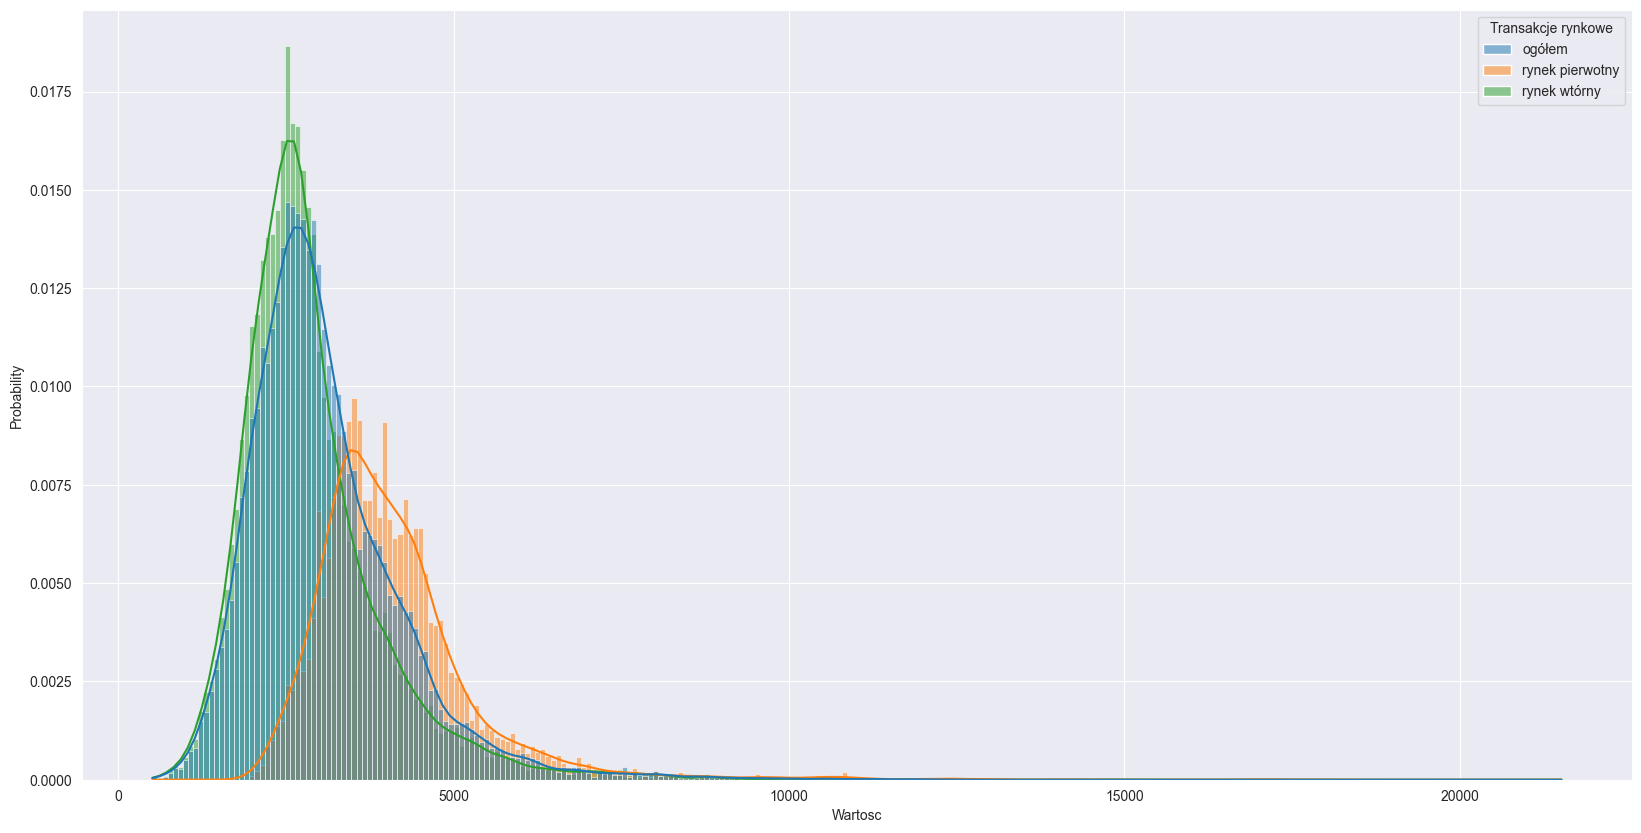

In [4]:
from seaborn import histplot
from matplotlib.pyplot import show, figure


figure(figsize=(20, 10))
histplot(data=data, x='Wartosc', hue='Transakcje rynkowe', kde=True, stat='probability')
show()

#### Task 1.6

The apartments available on the market mostly come from the secondary market, the price of which is noticeably lower compared to the primary market.

### Task 2 (continuation of the previous one)
1. Display the distribution function (`ecdfplot` function) of apartment values for the `general` transaction type.
2. Read by eye from the chart what percentage of apartments are sold for less than PLN 4,000. zloty.

#### Task 2.1

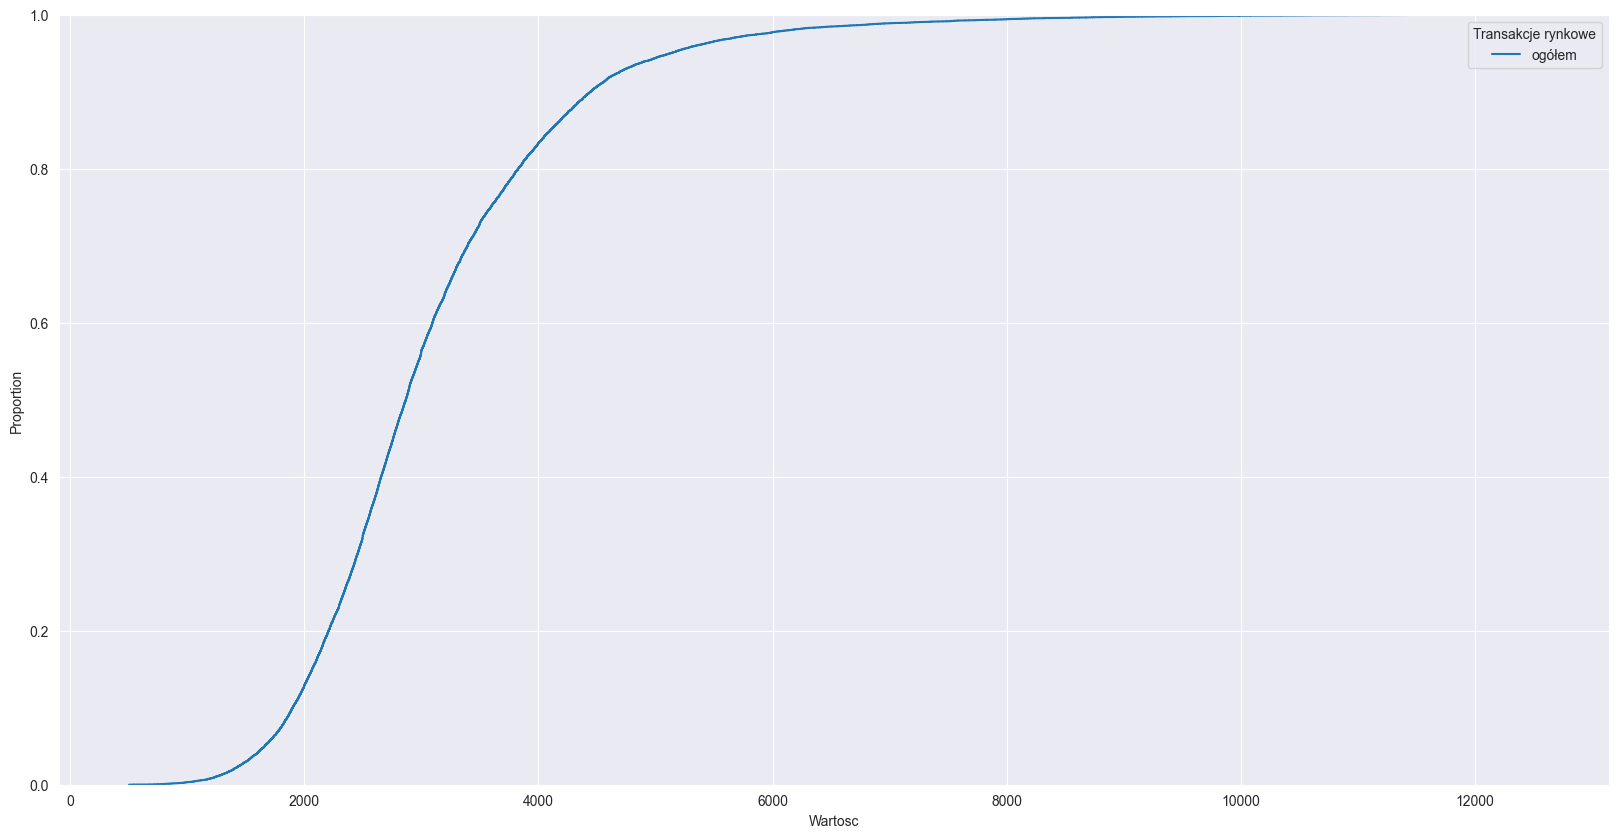

In [5]:
from seaborn import ecdfplot


figure(figsize=(20, 10))
ecdfplot(data=data[data['Transakcje rynkowe'] == 'ogółem'], x='Wartosc', hue='Transakcje rynkowe')
show()

#### Task 2.2

For a price under PLN 4,000. PLN 80% of apartments are sold.

### Task 3

The description of the dataset is included in the data file.

1. Load the `boston.txt` file (pay attention to the file format), without manually editing the file.
   > Hint: you can use the `read_csv` function with `skiprows`, `header`, `sep` parameters.
2. Display the probability mass function for the housing price.
3. Display the probability mass function for two variables (`x` and `y`): `MEDV`, `RM`. At what price and number of rooms are the most apartments sold? What else can be read from the chart?
4. Check one more attribute and describe the results.

#### Task 3.1

In [6]:
from re import split
from numpy import array
from pandas import DataFrame


with open('boston.txt', 'rt') as f:
    data = f.readlines()

raw_data = []
raw_data_append = raw_data.append

for i in range(22, len(data), 2):
    pre = split(' +', data[i].strip())
    post = split(' +', data[i + 1].strip())
    raw_data_append(pre + post)

data = array(raw_data).astype(float)
data = DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATI', 'B', 'LSTAT', 'MEDV'])

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATI,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


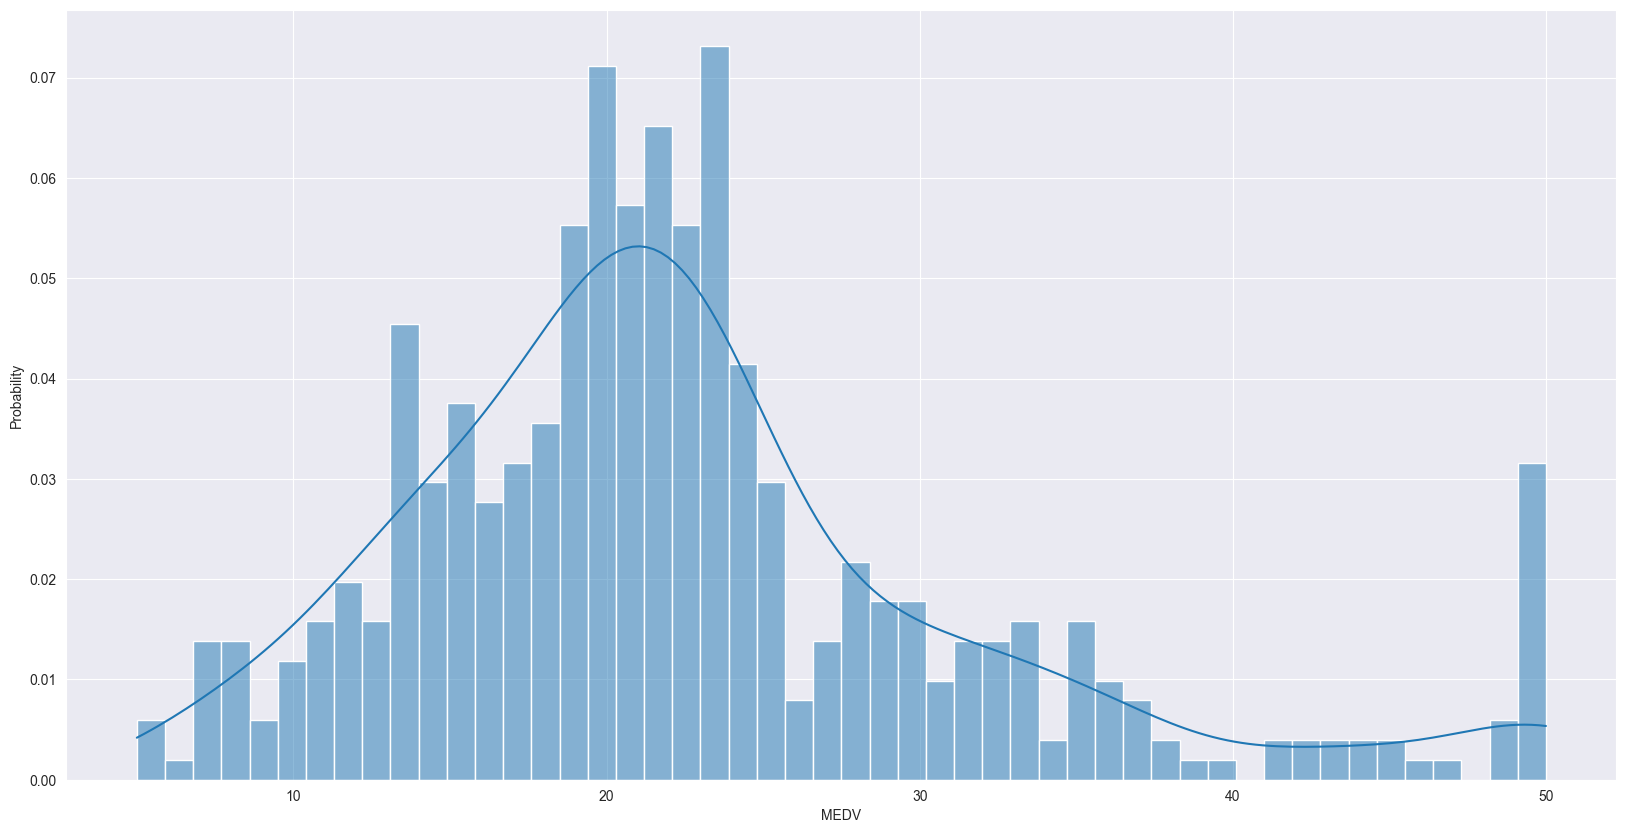

In [7]:
figure(figsize=(20, 10))
histplot(data=data, x='MEDV', kde=True, bins=50, stat='probability')
show()

#### Task 3.2

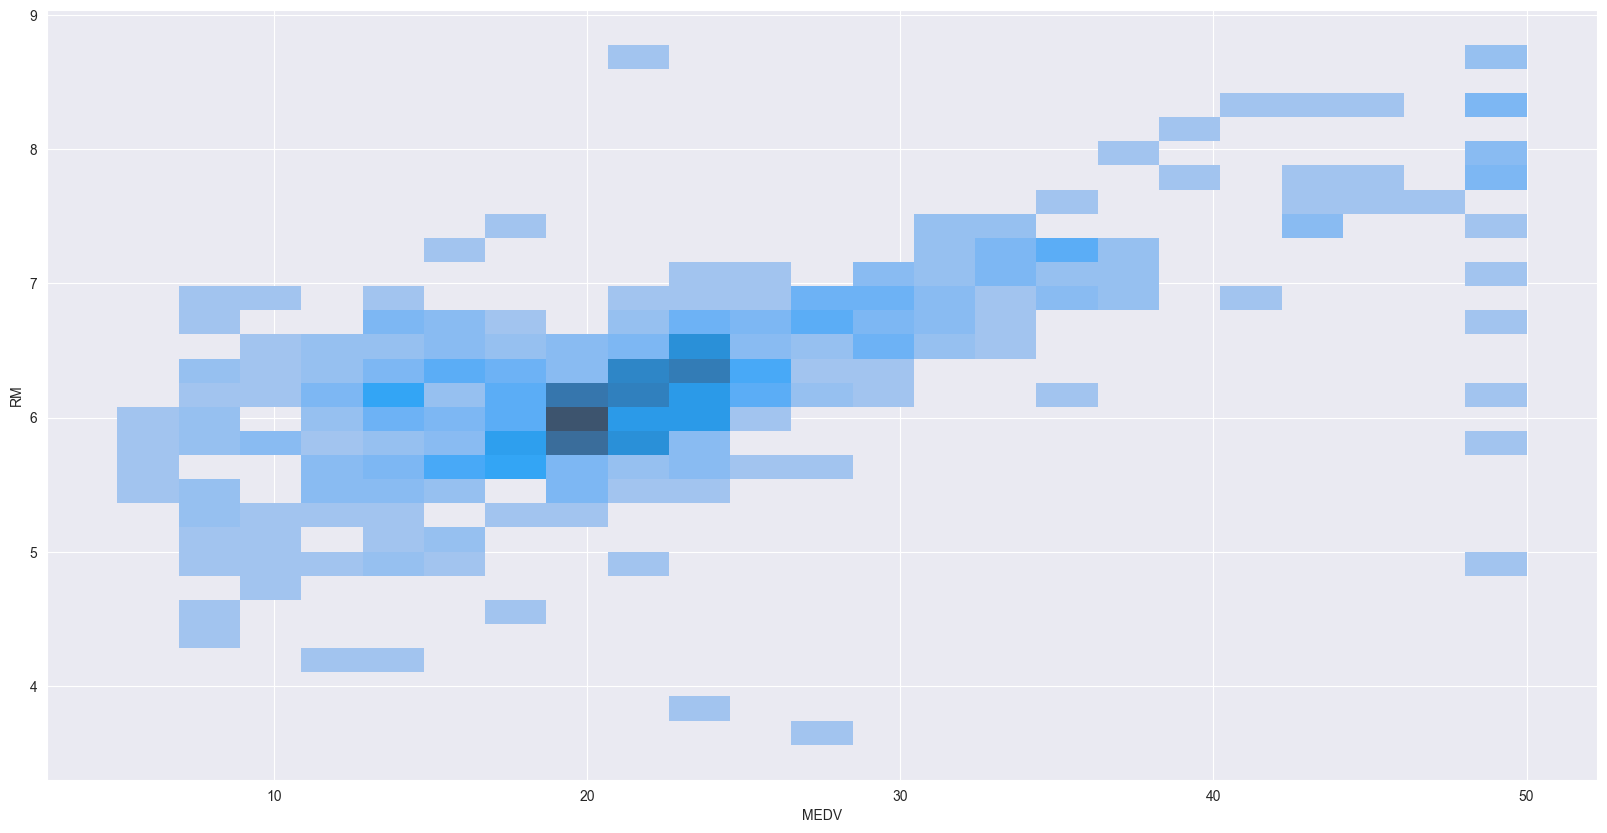

In [8]:
figure(figsize=(20, 10))
histplot(data=data, x='MEDV', y='RM', kde=True, stat='count')
show()

**At what price and number of rooms are the most apartments sold?**

Most apartments are sold for approximately PLN 20,000. with 6 rooms.

**What else can be read from the chart?**

Almost complete lack of sales of apartments with fewer than 4 rooms. Most apartments are sold with 5-7 rooms at a price between PLN 15,000 and PLN 30,000.

#### Task 3.3

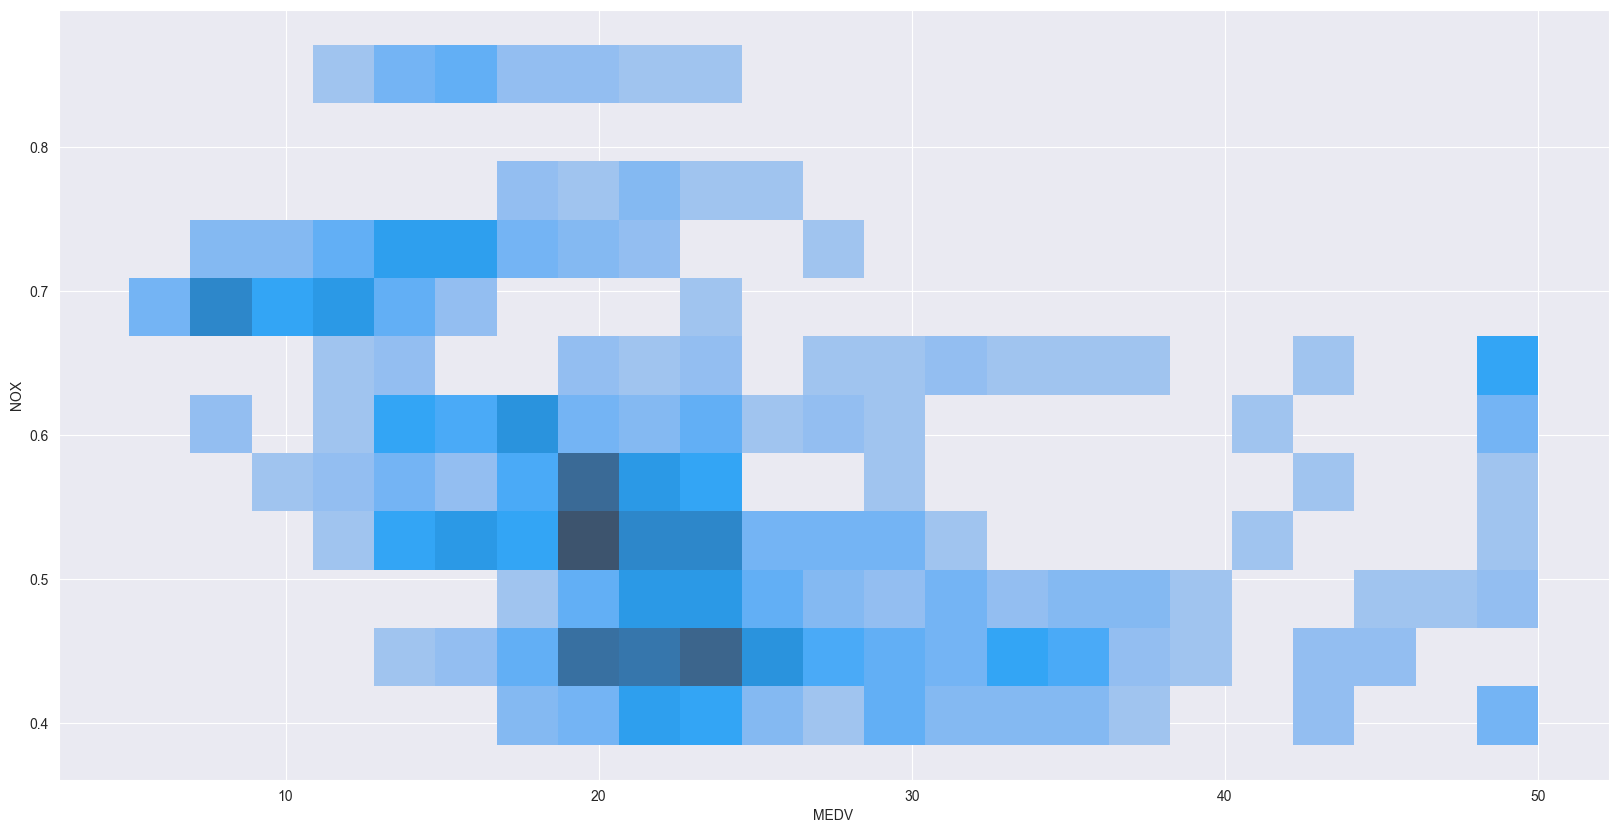

In [9]:
figure(figsize=(20, 10))
histplot(data=data, x='MEDV', y='NOX', kde=True, stat='count')
show()

Most apartments are sold with nitrogen oxide concentrations below 0.7. There is no noticeable difference in sales for apartments between concentrations in the range of 0.0-0.6. This means that people buying apartments do not pay attention to the level of nitrogen oxides concentration when making decisions about purchasing an apartment.